In [ ]:
# conda install ipywidgets
# conda install tabulate


/bin/bash: line 1: conda: command not found

Note: you may need to restart the kernel to use updated packages.


In [94]:
# Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import os
import cv2
from ipywidgets import widgets
from IPython.display import display
import vision_models.constants as constants
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno



In [87]:

# Define a custom palette with different shades of maroon
shades_of_maroon = [
    '#6a0808', 
    '#df8d40', 
    '#9c1313',  
    '#4f6496', 
    '#0e068c',  
    # '#CD5C5C',  
    # '#0b066e', 
]

# Define shades of maroon
red_to_navy = [
    '#6a0808',  # Dark maroon
    '#0e068c',  # Dark Navy
]

In [88]:
# Loading Data


# # Define constants
# TRAIN_DATA_PATH = "/opt/dataset/train_images/"
# TRAIN_LABEL_CORD_PATH = "/opt/dataset/train_label_coordinates.csv"
# TRAIN_SERIES_DESC_PATH = "/opt/dataset/train_series_descriptions.csv"
# TRAIN_LABEL_PATH = "/opt/dataset/train.csv"

# # Load dataframes
# train_label_coordinates_df = pd.read_csv(constants.TRAIN_LABEL_CORD_PATH)
# train_series_descriptions_df = pd.read_csv(constants.TRAIN_SERIES_DESC_PATH)
# train_df = pd.read_csv(constants.TRAIN_LABEL_PATH)

#Load Data
def load_data():
    train_labels = pd.read_csv(constants.TRAIN_LABEL_PATH)
    train_label_coordinates = pd.read_csv(constants.TRAIN_LABEL_CORD_PATH)
    train_series_descriptions = pd.read_csv(constants.TRAIN_SERIES_DESC_PATH)
    test_series_descriptions = pd.read_csv(constants.TEST_SERIES_DESC_PATH)
    return train_labels, train_label_coordinates, train_series_descriptions, test_series_descriptions

train_labels, train_label_coordinates, train_series_descriptions, test_series_descriptions = load_data()

# Display the first few rows of each DataFrame
print(train_labels.head())
print(train_label_coordinates.head())
print(train_series_descriptions.head())
print(test_series_descriptions.head())


   study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3  \
0   4003253                 Normal/Mild                 Normal/Mild   
1   4646740                 Normal/Mild                 Normal/Mild   
2   7143189                 Normal/Mild                 Normal/Mild   
3   8785691                 Normal/Mild                 Normal/Mild   
4  10728036                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5  \
0                 Normal/Mild                 Normal/Mild   
1                    Moderate                      Severe   
2                 Normal/Mild                 Normal/Mild   
3                 Normal/Mild                 Normal/Mild   
4                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2  \
0                 Normal/Mild                           Normal/Mild   
1                 Normal/Mild                           Normal/M

In [102]:
# Summarize data: record counts, missing values, and schema
def summarize_data(df, name):
    print(f"Summary for {name}:")
    print(f"Number of records: {len(df)}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"Schema:\n{df.dtypes}")
    print("-" * 40)

summarize_data(train_labels, "train_labels") # Some entries have incomplete labels
summarize_data(train_label_coordinates, "train_label_coordinates")
summarize_data(train_series_descriptions, "train_series_descriptions")
summarize_data(test_series_descriptions, "test_series_descriptions")


Summary for train_labels:
Number of records: 1975
Missing values:
study_id                                    0
spinal_canal_stenosis_l1_l2                 1
spinal_canal_stenosis_l2_l3                 1
spinal_canal_stenosis_l3_l4                 1
spinal_canal_stenosis_l4_l5                 1
spinal_canal_stenosis_l5_s1                 1
left_neural_foraminal_narrowing_l1_l2       2
left_neural_foraminal_narrowing_l2_l3       2
left_neural_foraminal_narrowing_l3_l4       2
left_neural_foraminal_narrowing_l4_l5       2
left_neural_foraminal_narrowing_l5_s1       2
right_neural_foraminal_narrowing_l1_l2      8
right_neural_foraminal_narrowing_l2_l3      8
right_neural_foraminal_narrowing_l3_l4      8
right_neural_foraminal_narrowing_l4_l5      8
right_neural_foraminal_narrowing_l5_s1      8
left_subarticular_stenosis_l1_l2          164
left_subarticular_stenosis_l2_l3           82
left_subarticular_stenosis_l3_l4            3
left_subarticular_stenosis_l4_l5            3
left_subarticu

In [ ]:

# Summarize data: record counts, missing values, and schema
def summarize_data(df, name):
    summary = {
        "DataFrame": name,
        "Number of records": len(df),
        # "Number of columns": df.columns,
        # "Missing values": df.isnull().sum().to_dict(),
        "Schema": df.dtypes.to_dict()
    }
    return summary

# Generate summaries
summaries = [
    summarize_data(train_labels, "train_labels"),
    summarize_data(train_label_coordinates, "train_label_coordinates"),
    summarize_data(train_series_descriptions, "train_series_descriptions"),
    summarize_data(test_series_descriptions, "test_series_descriptions")
]

# Convert summaries to a DataFrame for better visualization
summary_df = pd.DataFrame(summaries)

# Display the summaries as a table
print(tabulate(summary_df, headers='keys', tablefmt='grid'))
print(summary_df)

# Visualize missing values for each DataFrame
for df, name in [(train_labels, "train_labels"), 
                 (train_label_coordinates, "train_label_coordinates"), 
                 (train_series_descriptions, "train_series_descriptions"), 
                 (test_series_descriptions, "test_series_descriptions")]:
    plt.figure(figsize=(10, 6))
    msno.matrix(df)
    plt.title(f'Missing Values in {name}')
    plt.savefig(f'{name}_missing_values.png')
    plt.show()


<Figure size 1000x600 with 0 Axes>

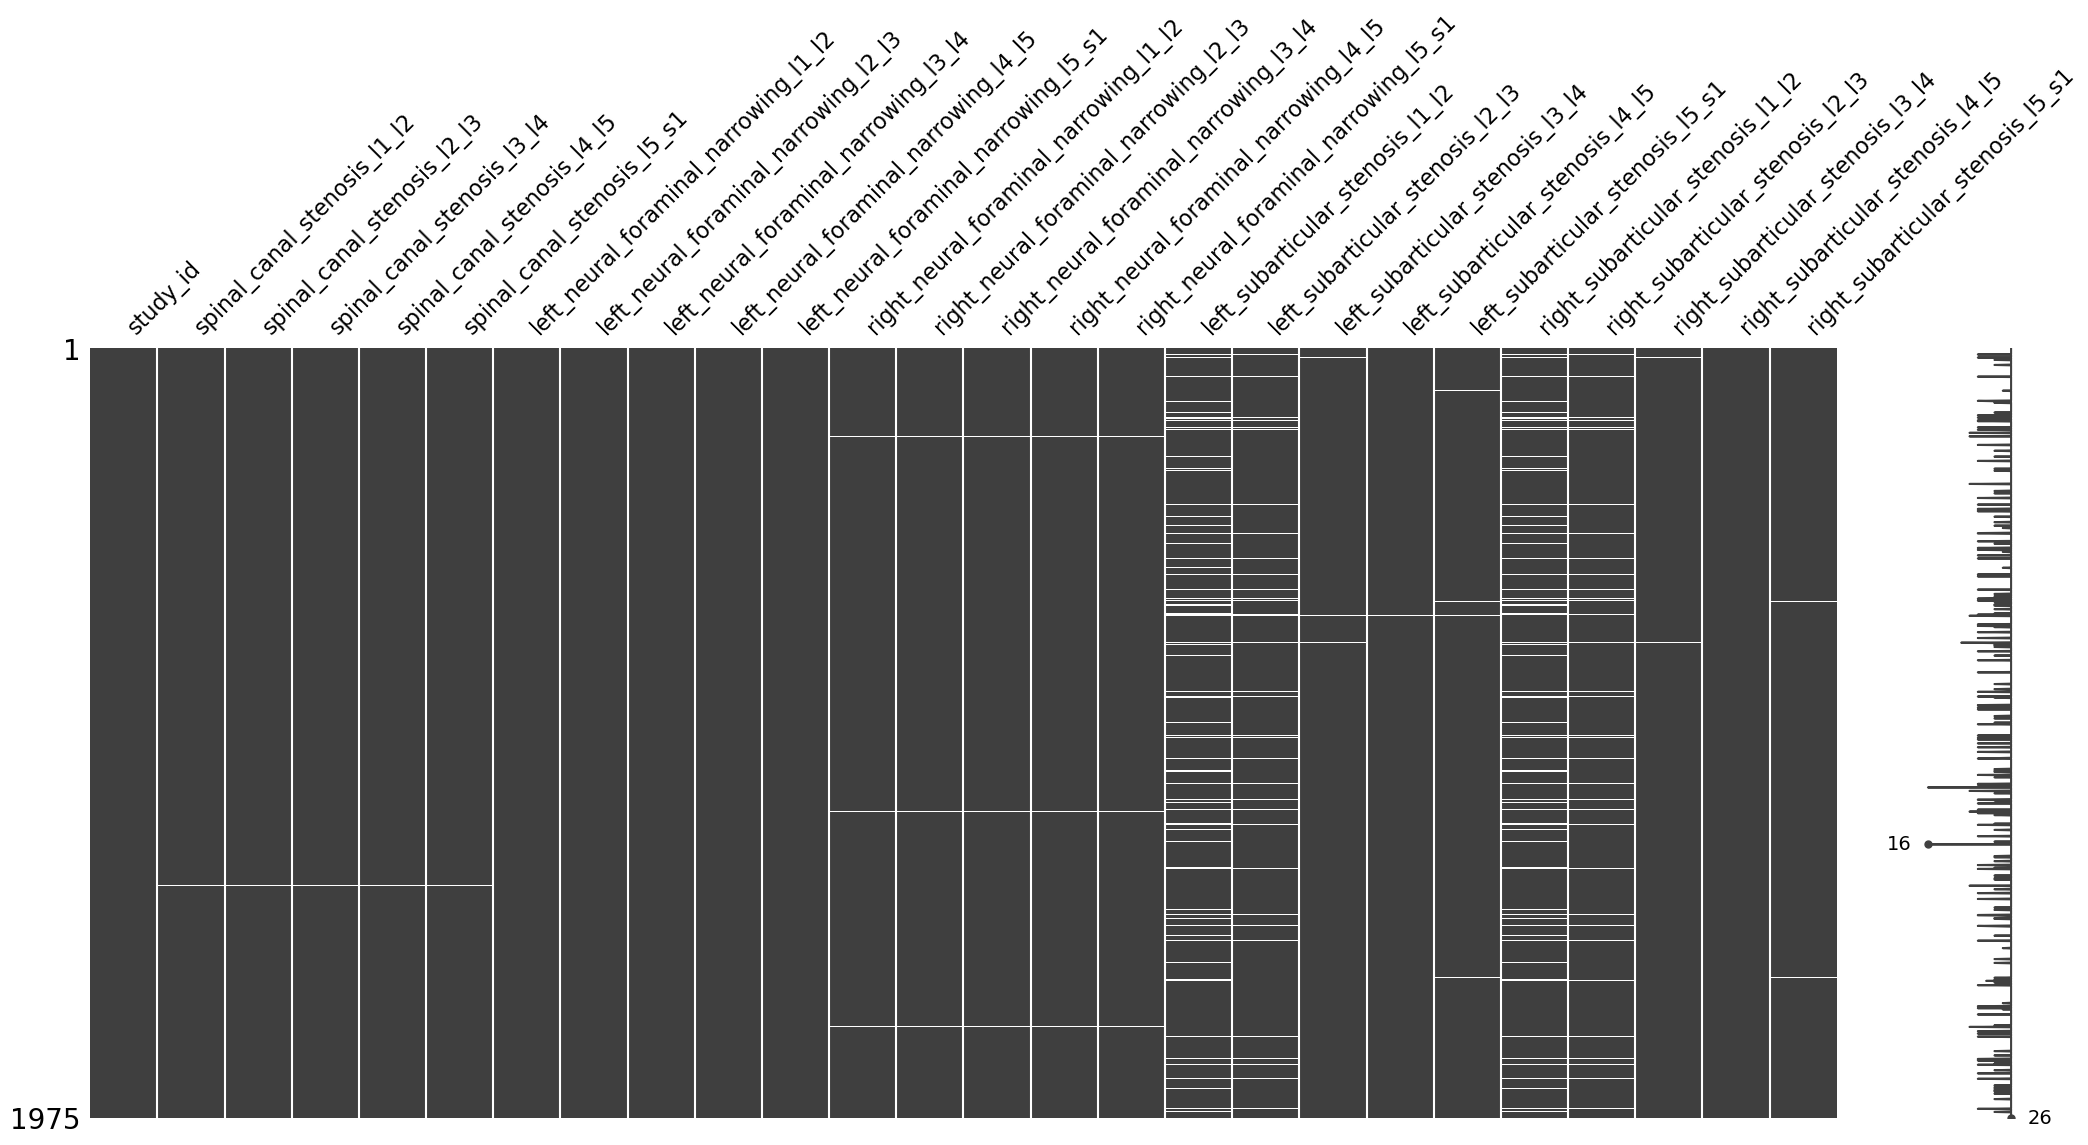

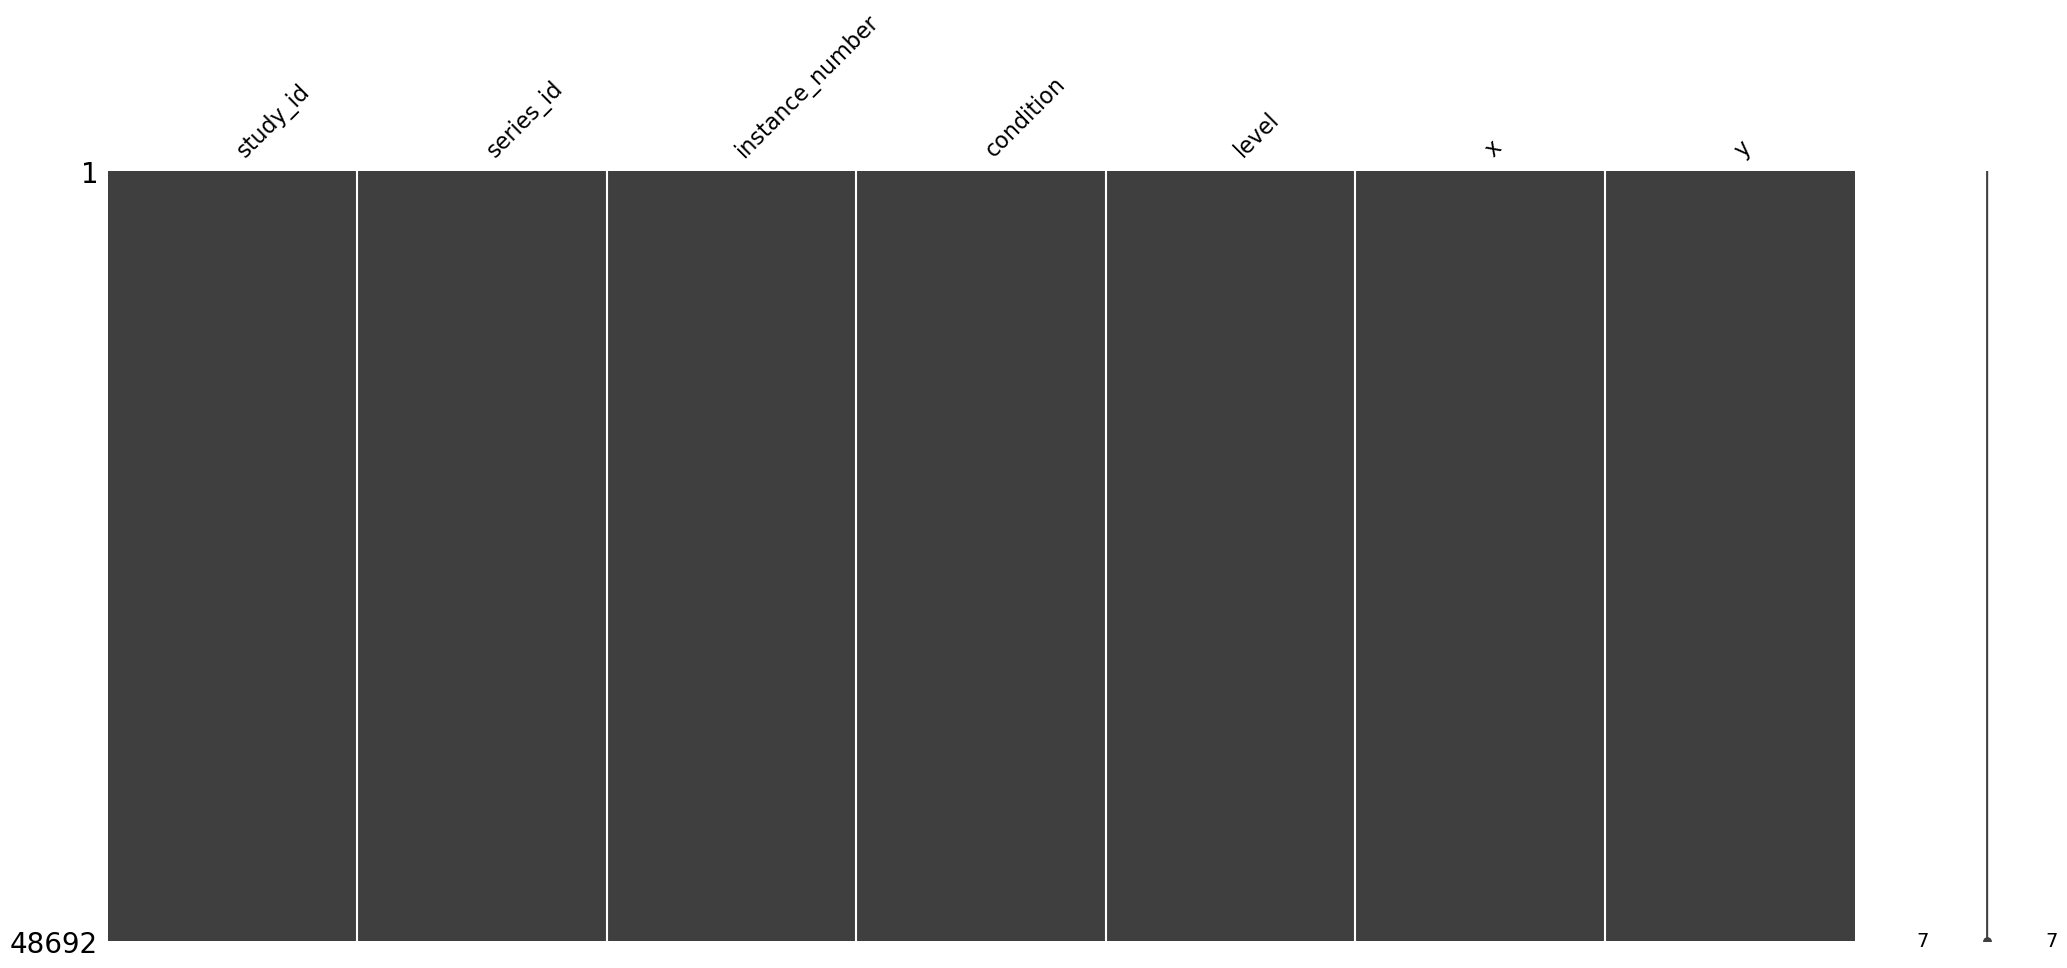

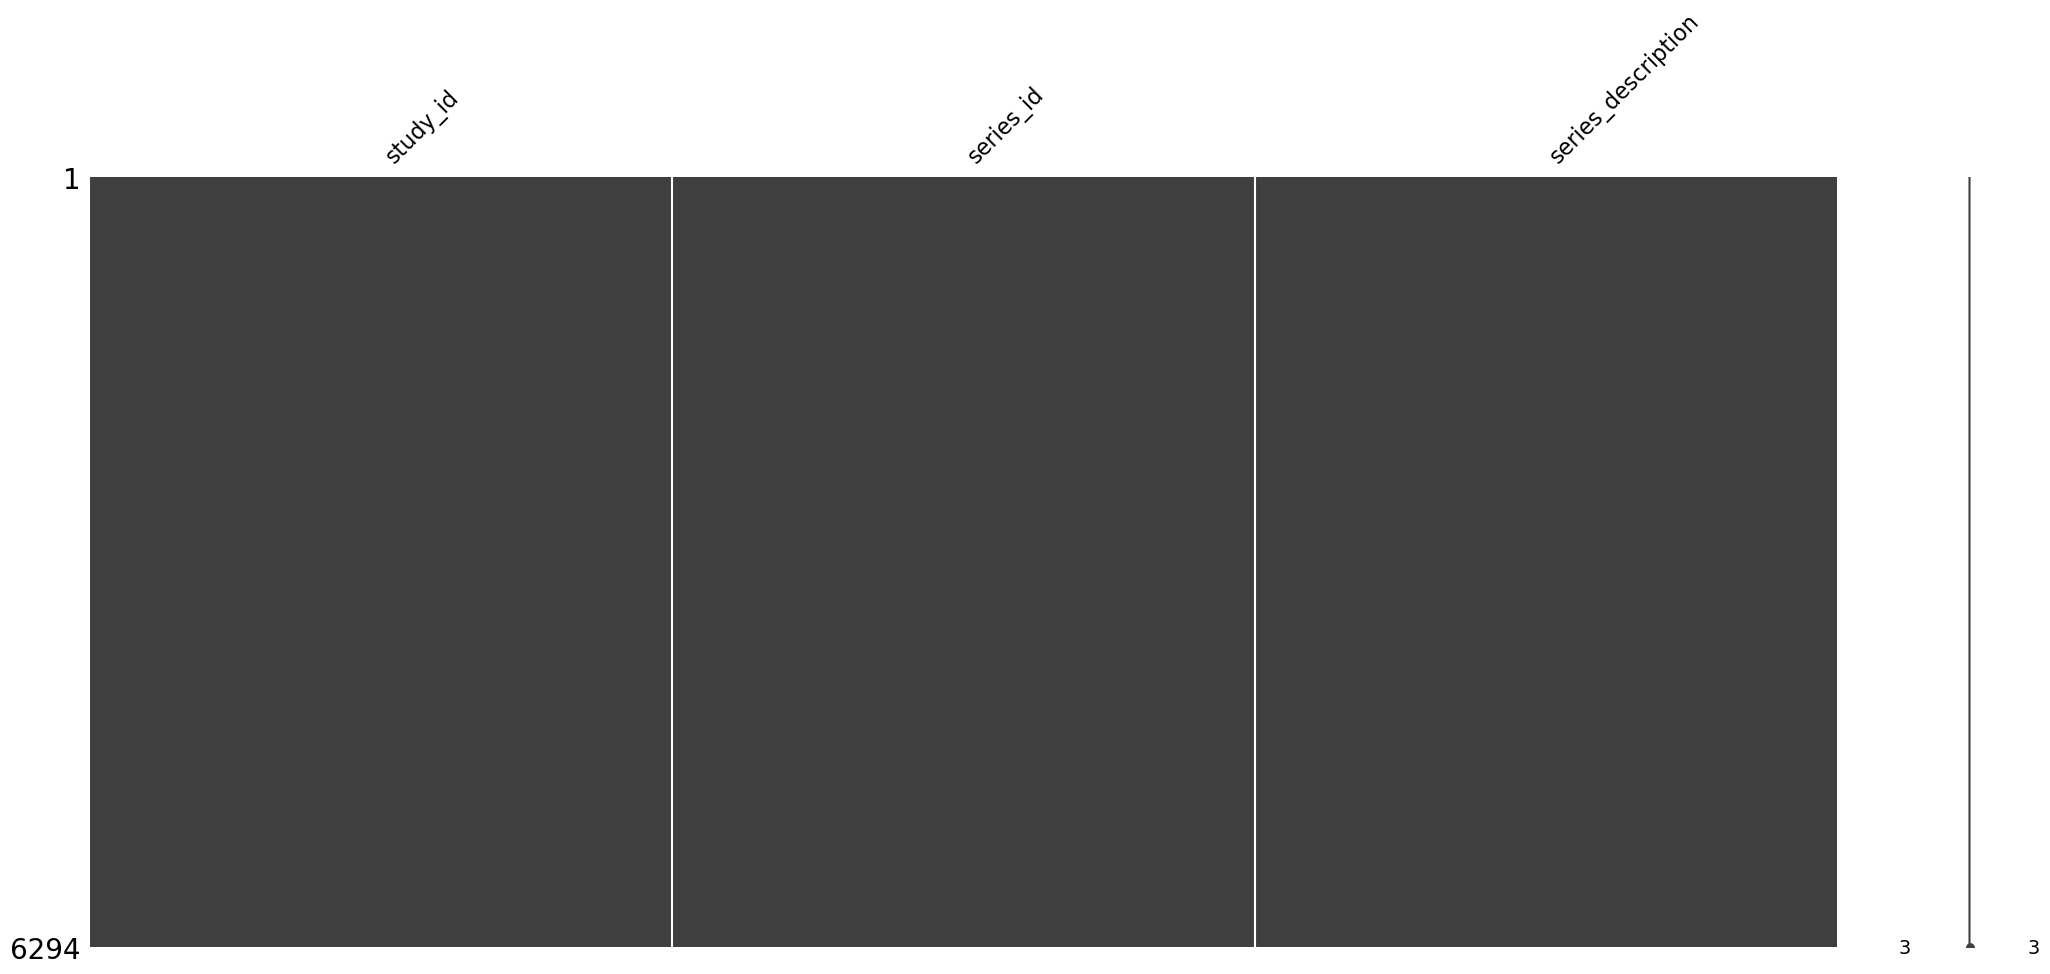

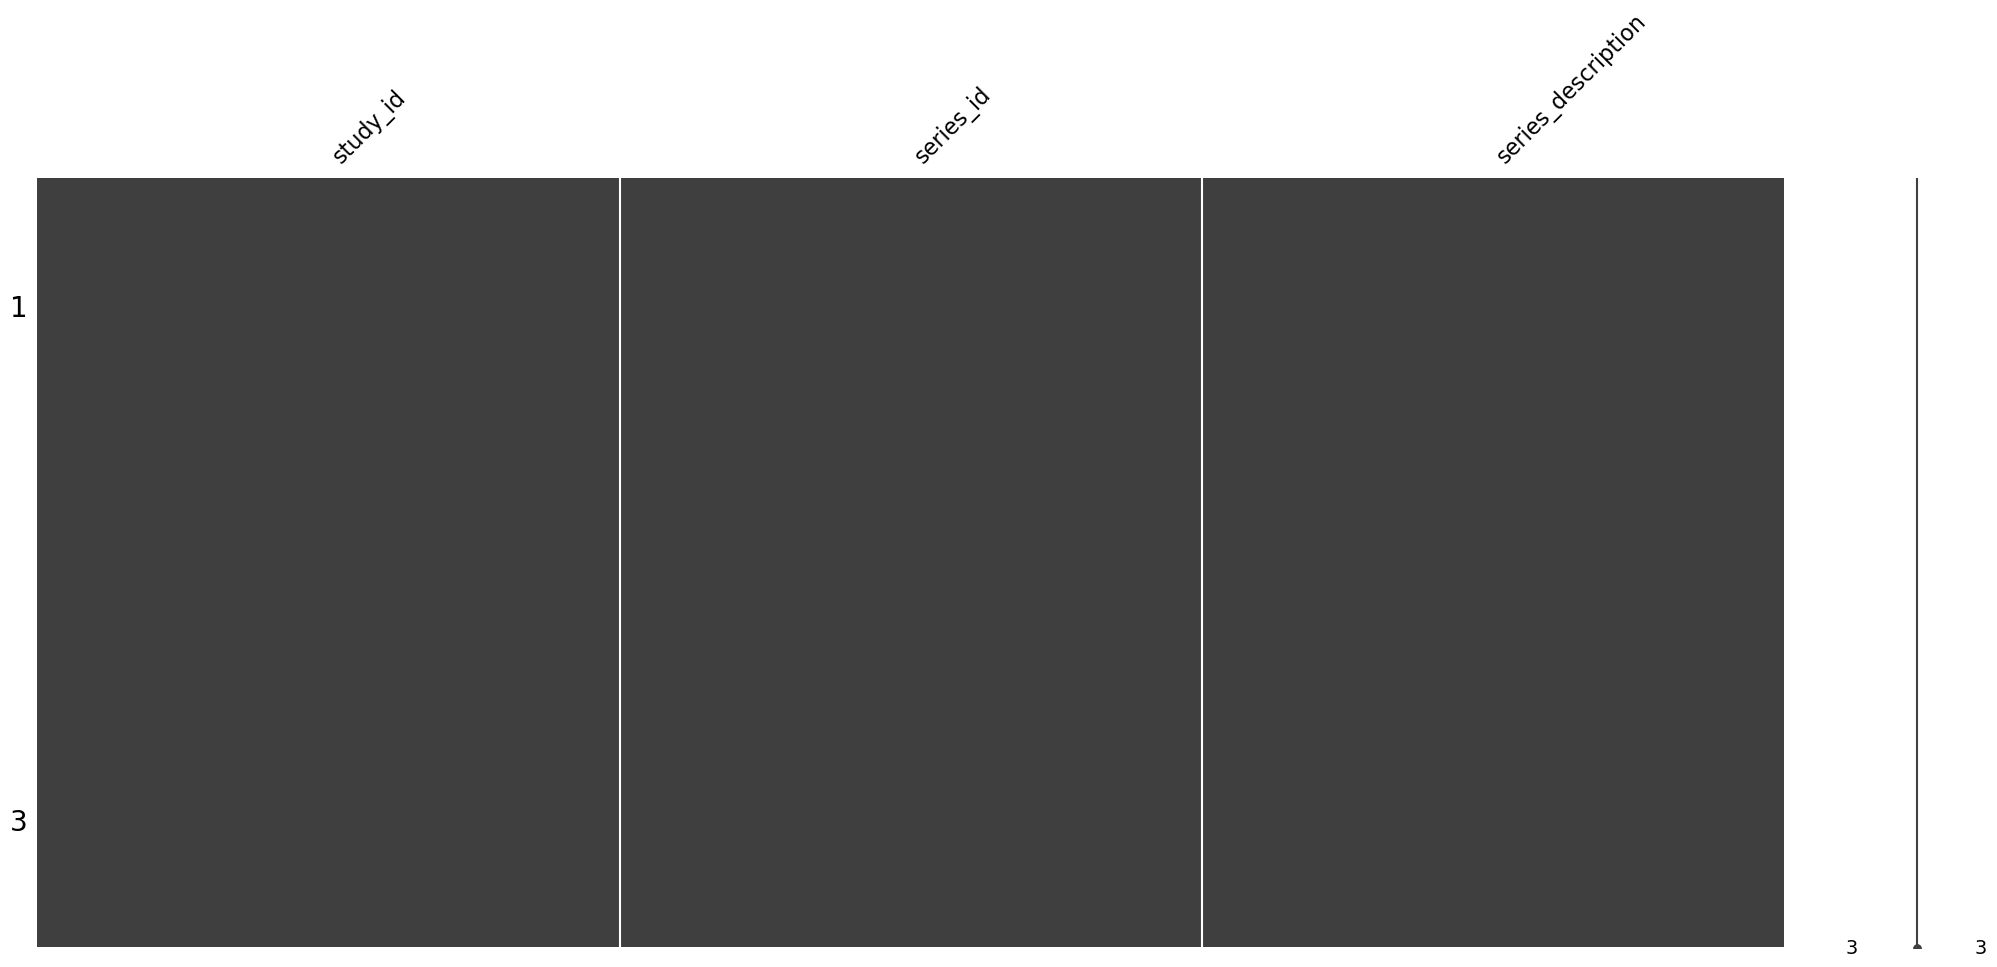

In [90]:
# Visualize missing values
plt.figure(figsize=(10, 6))
msno.matrix(train_labels)
plt.savefig('train_msno_plot.png')
plt.show()

msno.matrix(train_label_coordinates)
plt.show()

msno.matrix(train_series_descriptions)
plt.show()

msno.matrix(test_series_descriptions)
plt.show()


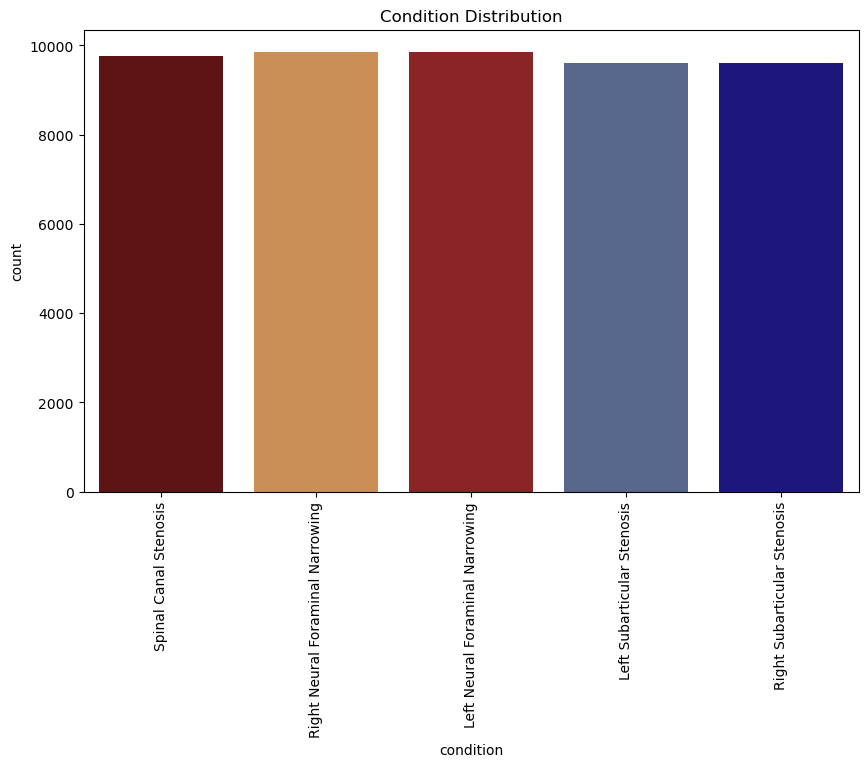

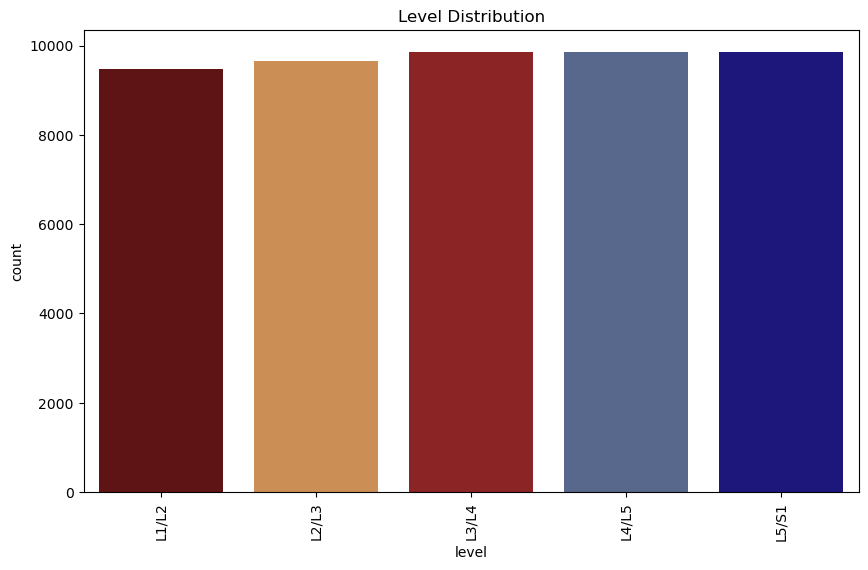

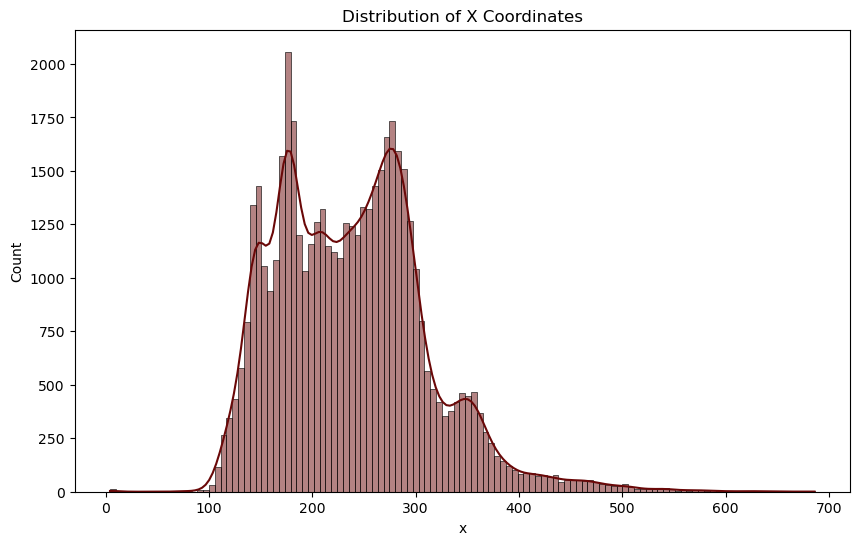

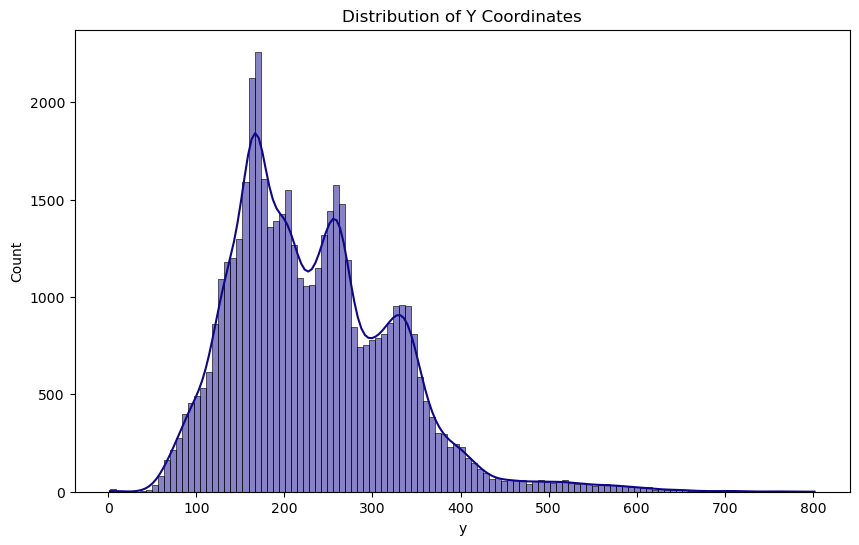

In [91]:
# Univariate analysis: Train labels Coordinates
def univariate_analysis(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue = column, palette=shades_of_maroon)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

univariate_analysis(train_label_coordinates, 'condition', 'Condition Distribution')
univariate_analysis(train_label_coordinates, 'level', 'Level Distribution')

# # Univariate analysis: Train label coordinates
# plt.figure(figsize=(10, 6))
# sns.histplot(train_label_coordinates['x'], kde=True)
# plt.title('Distribution of X Coordinates')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.histplot(train_label_coordinates['y'], kde=True)
# plt.title('Distribution of Y Coordinates')
# plt.show()



# Univariate analysis: Train label coordinates for x
plt.figure(figsize=(10, 6))
sns.histplot(train_label_coordinates['x'], kde=True, color=red_to_navy[0])
plt.title('Distribution of X Coordinates')
plt.show()

# Univariate analysis: Train label coordinates for y
plt.figure(figsize=(10, 6))
sns.histplot(train_label_coordinates['y'], kde=True, color=red_to_navy[1])
plt.title('Distribution of Y Coordinates')
plt.show()


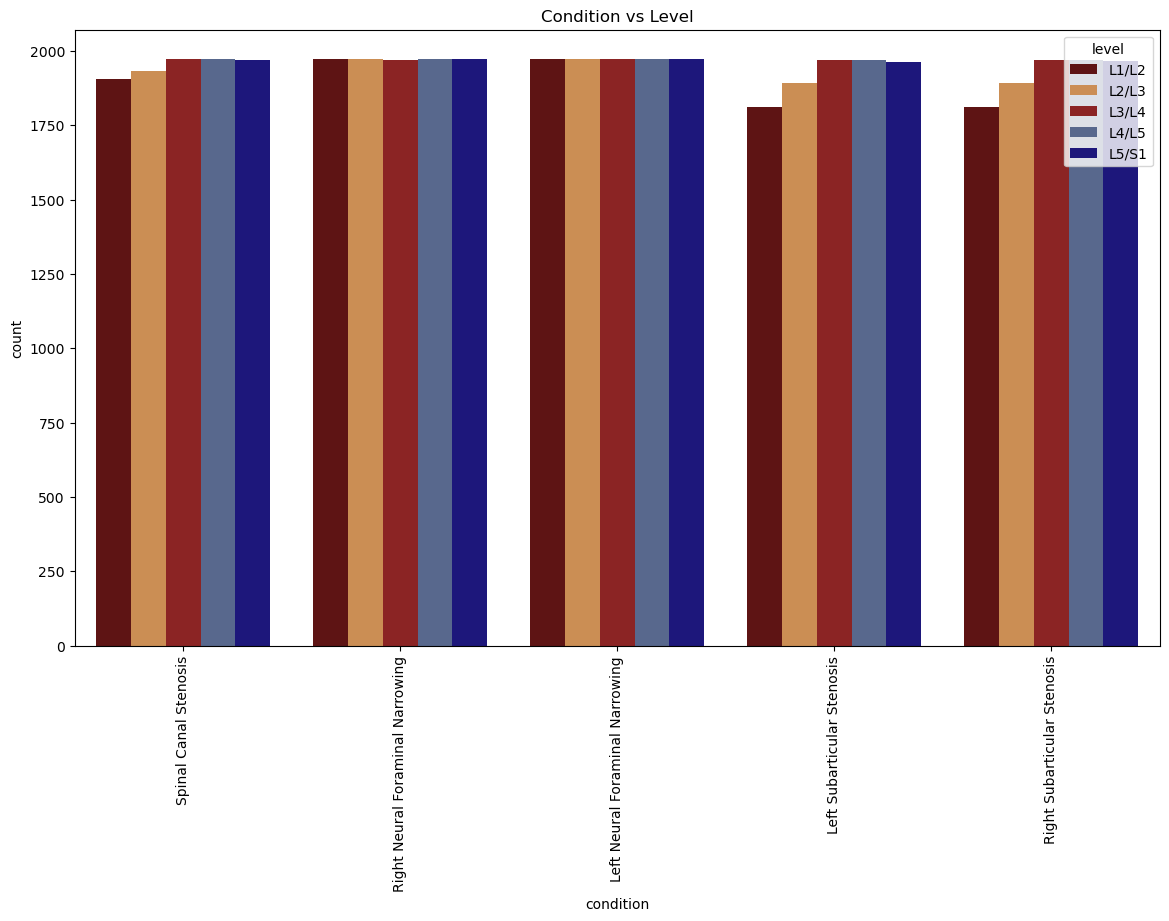

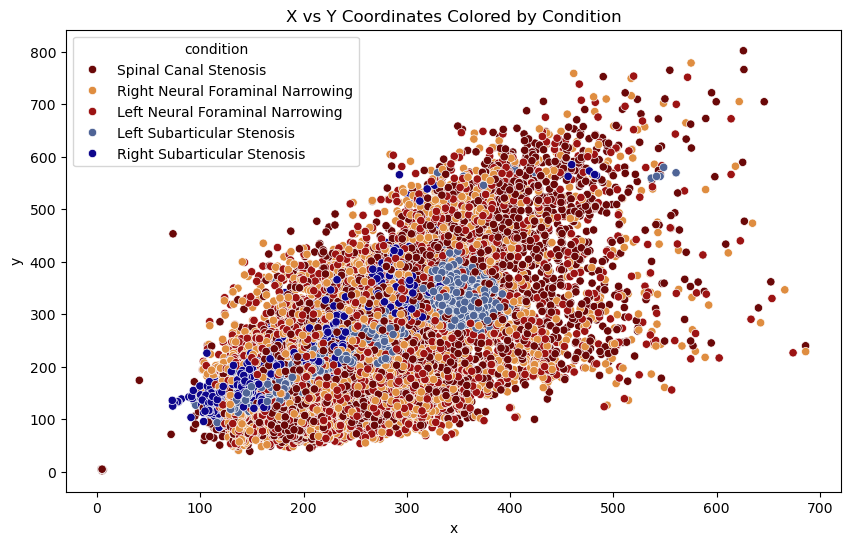

In [56]:
# Bivariate analysis: Condition vs Level
plt.figure(figsize=(14, 8))
sns.countplot(data=train_label_coordinates, x='condition', hue='level', palette=shades_of_maroon)
plt.title('Condition vs Level')
plt.xticks(rotation=90)
plt.show()

# Bivariate analysis: X vs Y coordinates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_label_coordinates, x='x', y='y', hue='condition', palette=shades_of_maroon)
plt.title('X vs Y Coordinates Colored by Condition')
plt.show()

# Conditions are more common in L3 to L5 because the spine is more narrow down in those areas
# The x-y coordinates colored by condition doesn't have much value because the coordinates is more dependent on how the MRI was taken rather than anything about the condition itself. Useful for identifying the condition.

In [12]:
# Image Data: Histogram of pixel values
def plot_image_histogram(image_path, title):
    image = plt.imread(image_path)
    plt.figure(figsize=(10, 6))
    plt.hist(image.ravel(), bins=256, color='orange', )
    plt.hist(image[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
    plt.hist(image[:, :, 1].ravel(), bins=256, color='Green', alpha=0.5)
    plt.hist(image[:, :, 2].ravel(), bins=256, color='Blue', alpha=0.5)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Example usage
# plot_image_histogram('path_to_image.png', 'Histogram of Image Pixel Values')


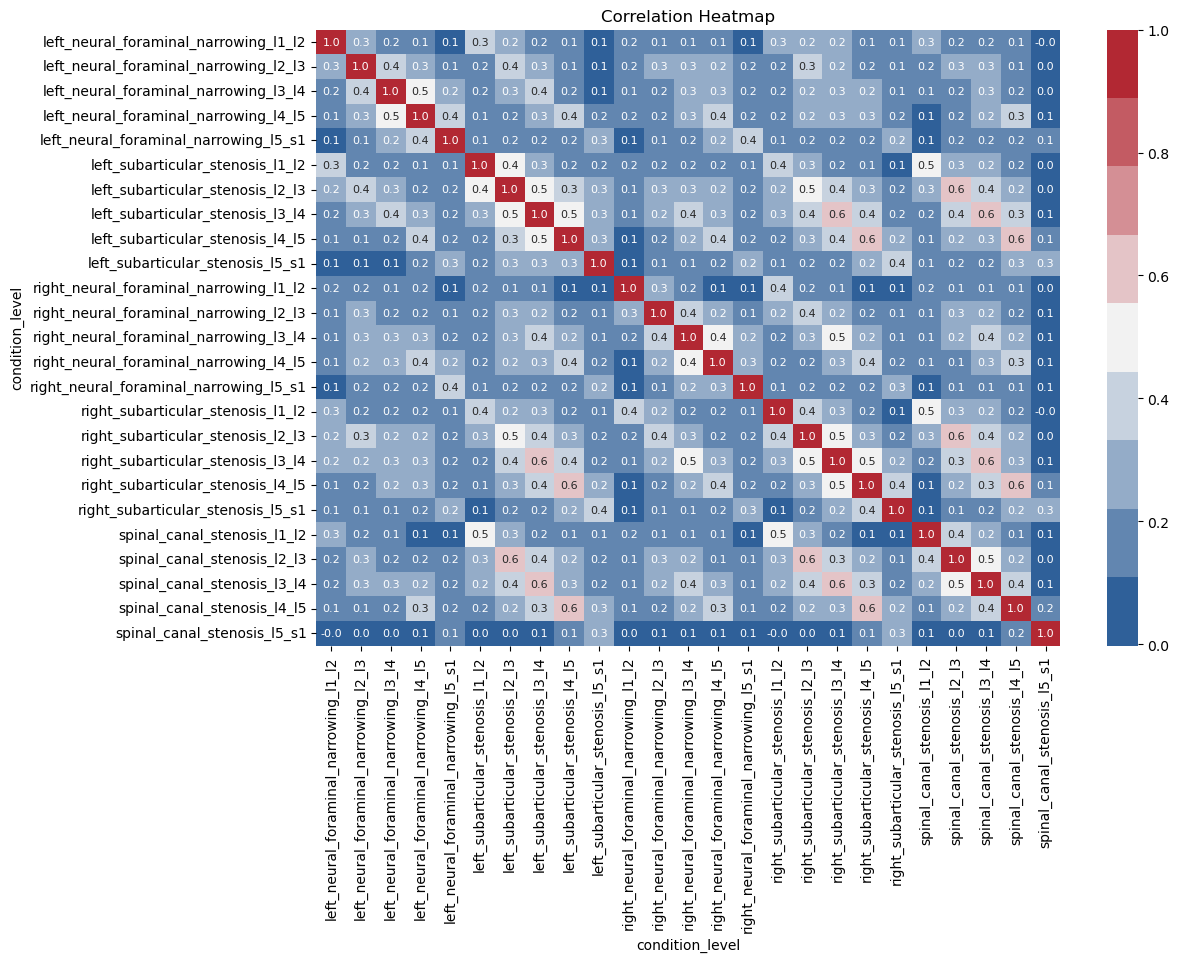

In [28]:
# Pivot the DataFrame from wide format to long format
train_labels_long = pd.melt(train_labels, id_vars=["study_id"], var_name="condition_level", value_name="severity")

# Define a mapping for the categorical values
condition_mapping = {
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
}

# Apply the mapping to the 'severity' column
train_labels_long['severity_num'] = train_labels_long['severity'].map(condition_mapping)

# Pivot the DataFrame back to wide format with numerical values
train_labels_pivoted = train_labels_long.pivot(index='study_id', columns='condition_level', values='severity_num')

# Compute the correlation matrix
corr = train_labels_pivoted.corr()

# Create a custom colormap
cmap = sns.diverging_palette(250, 10, s=80, l=40, sep=10, n=9, center="light")

# Plot the heatmap with maroon and navy contrast
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".1f", cmap=cmap, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

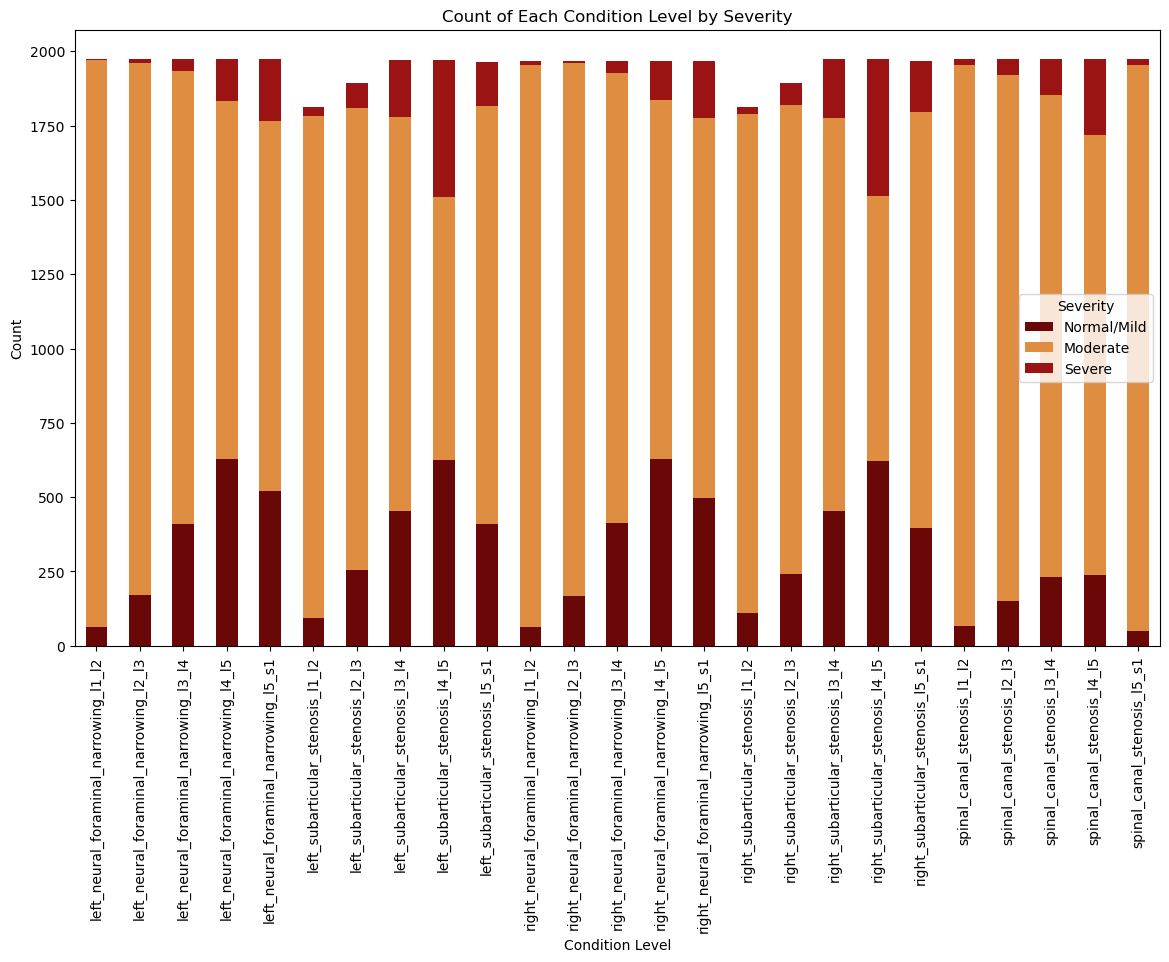

In [80]:
# Count the occurrences of each severity for each condition_level
severity_counts = train_labels_long.groupby(['condition_level', 'severity']).size().unstack(fill_value=0)

# Plot a stacked bar chart
severity_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=shades_of_maroon)
plt.title('Count of Each Condition Level by Severity')
plt.xlabel('Condition Level')
plt.ylabel('Count')
plt.legend(title='Severity', labels=['Normal/Mild', 'Moderate', 'Severe'])
plt.show()

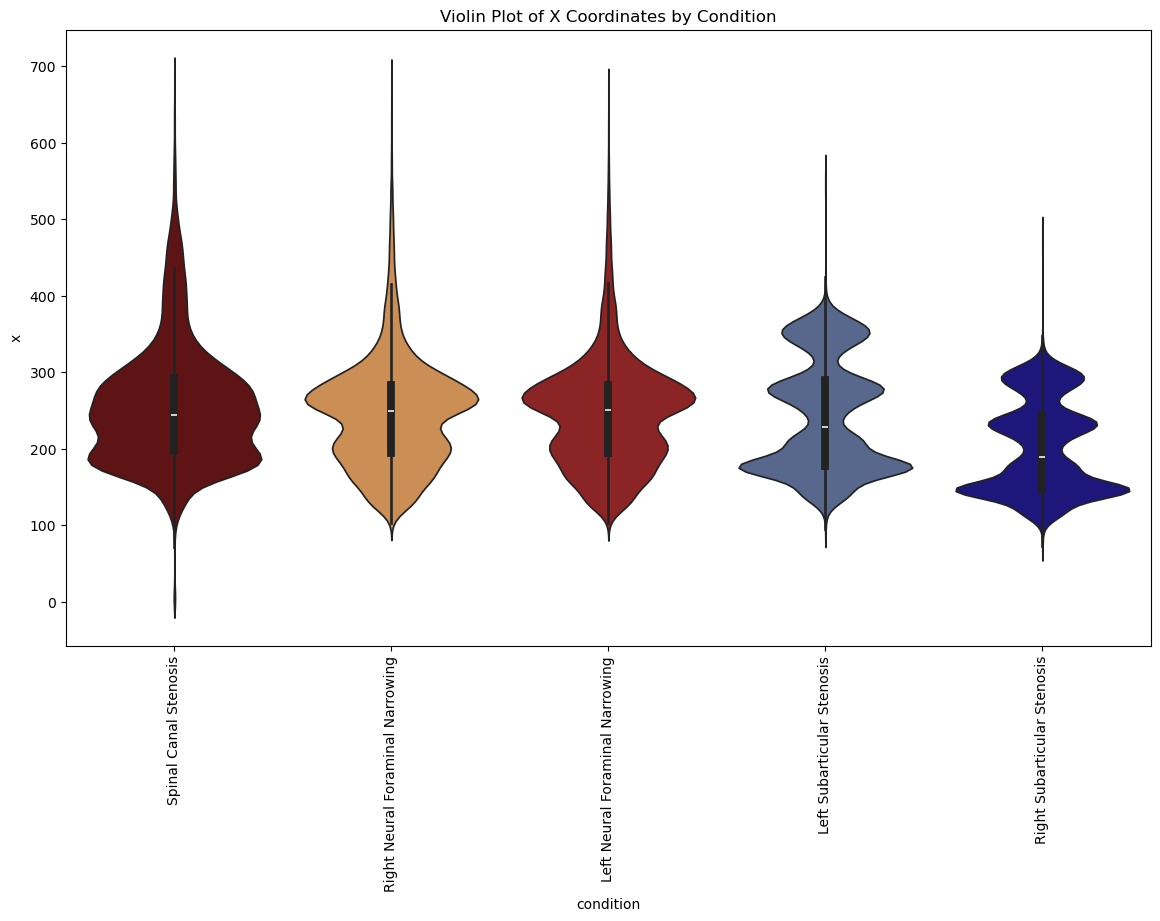

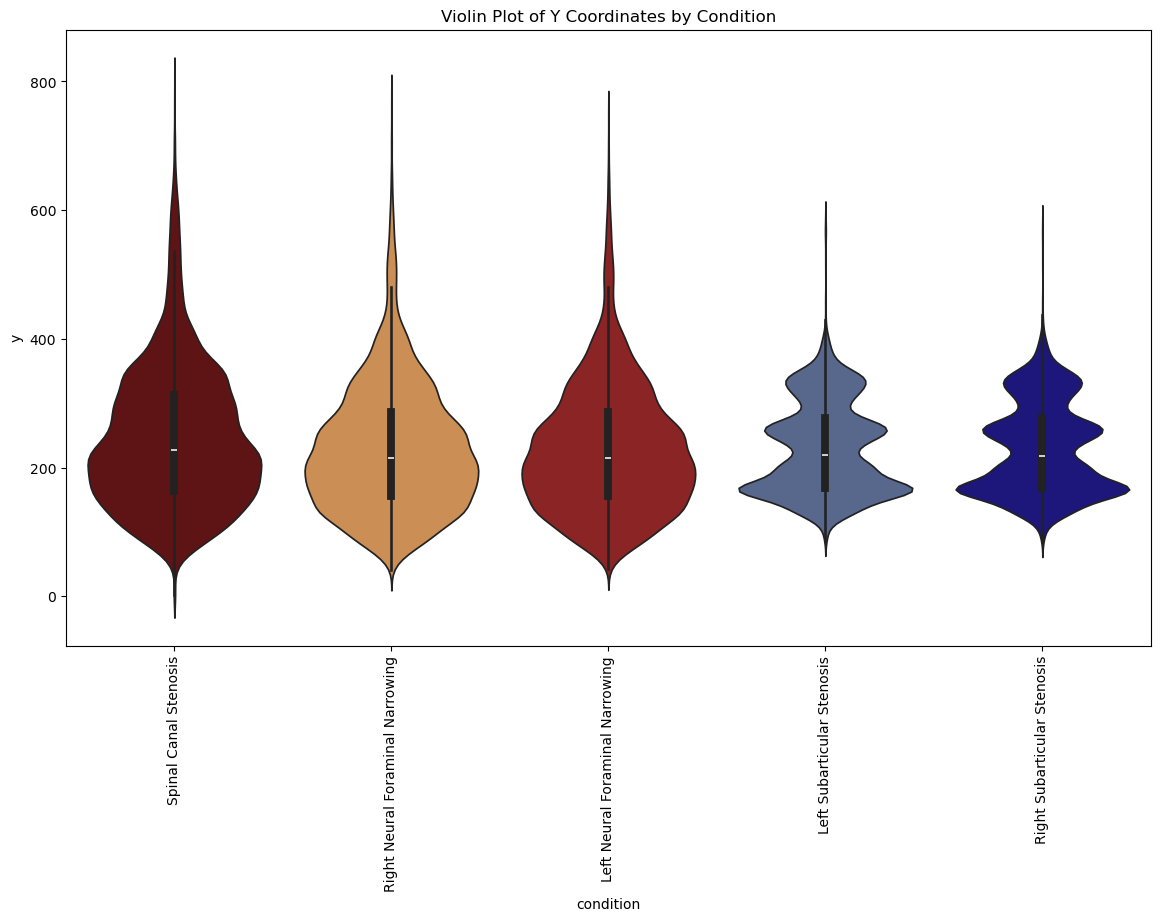

In [66]:
# Violin plot of coordinates by condition
plt.figure(figsize=(14, 8))
sns.violinplot(data=train_label_coordinates, x='condition', y='x', hue = 'condition', palette=shades_of_maroon)
plt.title('Violin Plot of X Coordinates by Condition')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 8))
sns.violinplot(data=train_label_coordinates, x='condition', y='y', hue = 'condition', palette=shades_of_maroon)
plt.title('Violin Plot of Y Coordinates by Condition')
plt.xticks(rotation=90)
plt.show()


In [34]:
# Join the data on 'study_id' and 'series_id'
merged_df = pd.merge(train_label_coordinates, train_series_descriptions, on=['study_id', 'series_id'])

merged_df.to_csv('train_label_series_desc.csv', index = False)

# Display the first few rows of the merged dataframe
merged_df.head()

,study_id,series_id,instance_number,condition,level,x,y,series_description
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Sagittal T2/STIR
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Sagittal T2/STIR
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Sagittal T2/STIR
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Sagittal T2/STIR
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Sagittal T2/STIR


/var/tmp/ipykernel_5798/4275289238.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(y='series_description', data=merged_df, order=merged_df['series_description'].value_counts().index, hue = 'series_description', palette=shades_of_maroon)


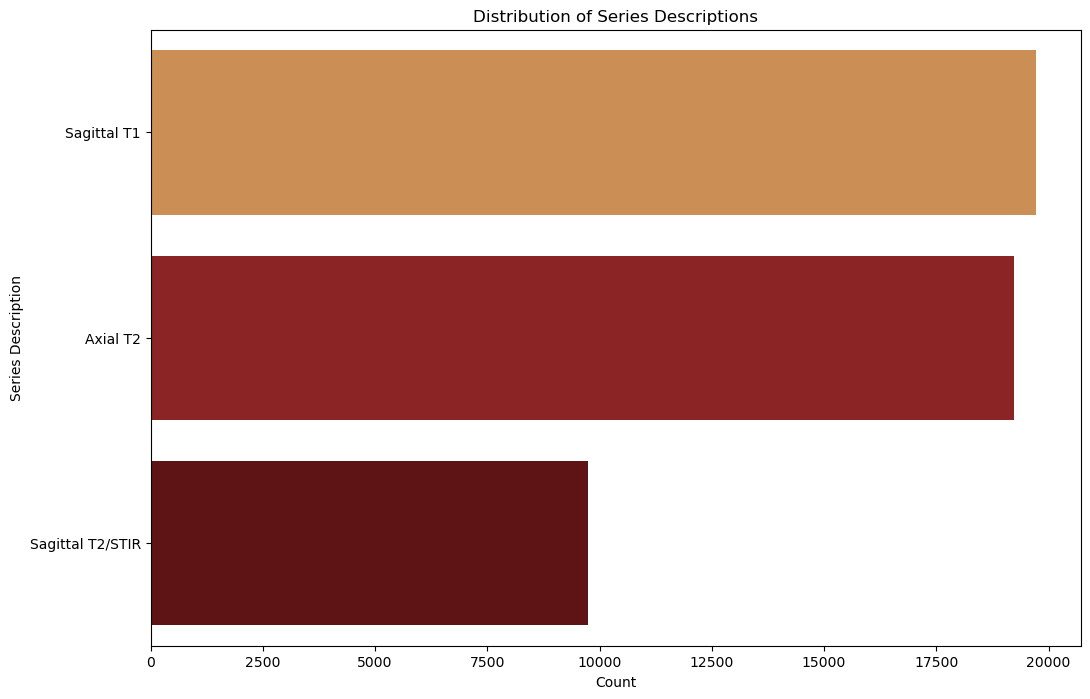

In [67]:
# Plot the distribution of series descriptions
plt.figure(figsize=(12, 8))
sns.countplot(y='series_description', data=merged_df, order=merged_df['series_description'].value_counts().index, hue = 'series_description', palette=shades_of_maroon)
plt.title('Distribution of Series Descriptions')
plt.xlabel('Count')
plt.ylabel('Series Description')
plt.show()

#48,692 study_id, series_id, condition, level, instance combinations (aka number of diseases present)


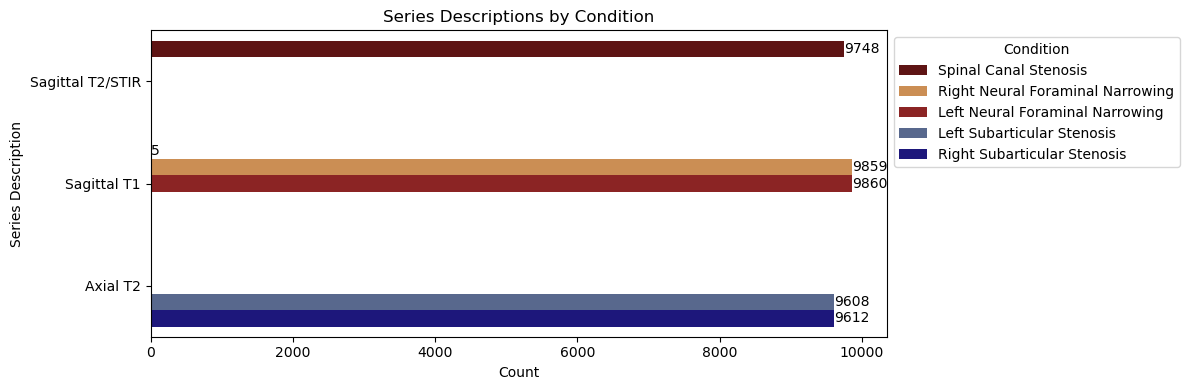

In [52]:
# # Plot the count of series descriptions by condition
# plt.figure(figsize=(14, 10))
# sns.countplot(y='series_description', hue='condition', data=merged_df, palette='muted')
# plt.title('Series Descriptions by Condition')
# plt.xlabel('Count')
# plt.ylabel('Series Description')
# plt.legend(title='Condition')
# plt.show()



# Plot the count of series descriptions by condition
plt.figure(figsize=(12, 4))
ax = sns.countplot(y='series_description', hue='condition', data=merged_df, palette=shades_of_maroon)
plt.title('Series Descriptions by Condition')
plt.xlabel('Count')
plt.ylabel('Series Description')

# Add value annotations at the end of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=0, fontsize=10, color='black')

# Move the legend to the upper left outside the plot
plt.legend(title='Condition', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

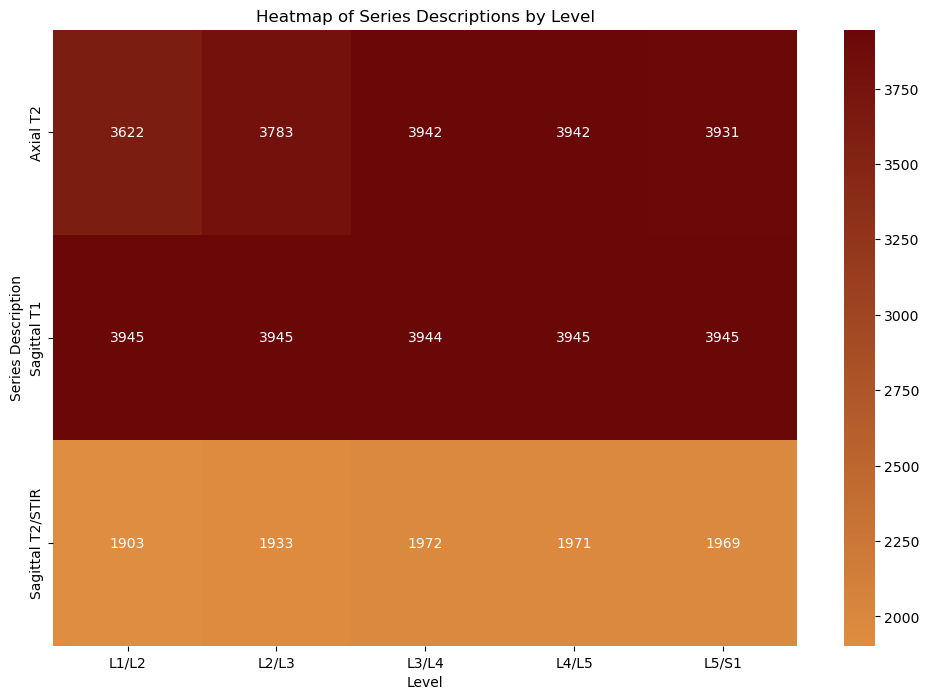

In [78]:
from matplotlib.colors import LinearSegmentedColormap

# Create a pivot table for the heatmap
pivot_table = pd.pivot_table(merged_df, values='study_id', index='series_description', columns='level', aggfunc='count', fill_value=0)

# # Plot the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
# plt.title('Heatmap of Series Descriptions by Level')
# plt.xlabel('Level')
# plt.ylabel('Series Description')
# plt.show()

# Define custom colors from maroon to navy
maroon_to_gold = [
    '#df8d40',
    '#6a0808',
]

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list('maroon_to_navy', maroon_to_gold)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap=custom_cmap, fmt='d')
plt.title('Heatmap of Series Descriptions by Level')
plt.xlabel('Level')
plt.ylabel('Series Description')
plt.show()


/var/tmp/ipykernel_5798/3948439814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='condition', y='series_description', data=merged_df, palette='pastel')


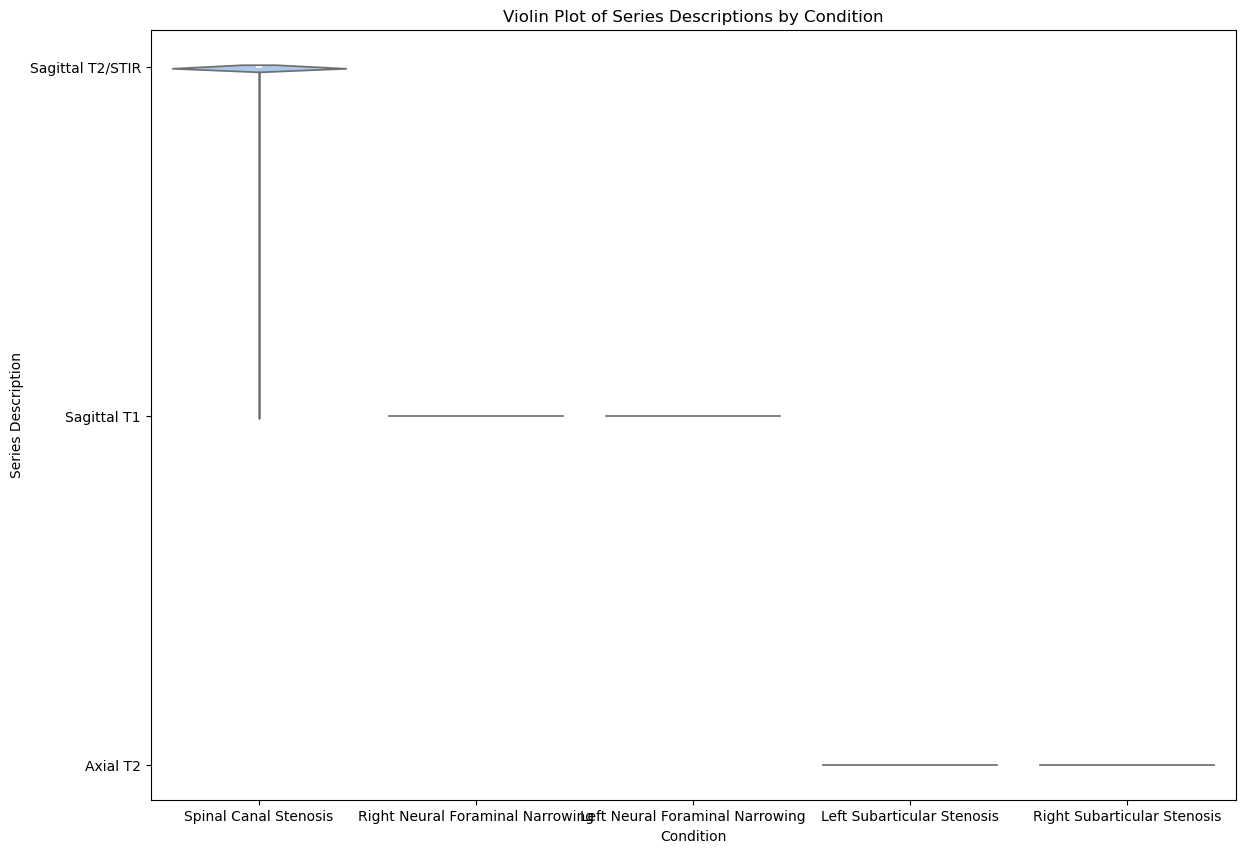

In [37]:
# Plot a violin plot of series descriptions by condition
plt.figure(figsize=(14, 10))
sns.violinplot(x='condition', y='series_description', data=merged_df, palette='pastel')
plt.title('Violin Plot of Series Descriptions by Condition')
plt.xlabel('Condition')
plt.ylabel('Series Description')
plt.show()
